In [1]:
# Aineistona on sosiaalisen median data 1.1.2020-30.4.2021 hauilla ruoanlaitto* OR kotiruoka* OR "laittaa # ruokaa" OR "ruoan laitto*" OR "ruuan laitto*" OR arkiruoka*

# Tavoitteena on löytää mahdollisia kuluttajatottumusten muutoksia ennen koronaa ja koronan aikana     
# ruoanlaitossa sosiaalisen median kanavissa. 
# Sentimentin kehitys: minkälaiset teemat sävyttävät kielteisesti ja myönteisesti nopeasti liikkuvissa kulutustavaroissa? 
# Avaintuloksia voi ristiintaulukoida alueellisesti maakunnittain ja ajanjaksolla ennen koronaa ja sen aikana. 
# Ristiintaulukointi sentimentti vs. asuinmaakunta tehtävissä.
# Tekstipilvet Body-sarakkeesta.
# Tekstipilvet Keywords = sanat, jotka haetuista sanoista ovat löytyneet kyseisestä osumasta
# Tekstipilvet Key Phrases = poimii substantiivit, nimet ja käsitteet
# Engagement (reaktioiden määrä some-julkaisuissa)
# Social Echo (artikkelin jakokerrat somessa, sekä tykkäykset Facebook/Twitter/Reddit)
# Kanavat (onko keskustelu vaihtunut ajan myötä muihin lähteisiin)

# Tuodaan data sisään

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

df = pd.read_excel("kotiruoka 12052021 sanapilvi.xlsx")
df.head()

,Date,Headline,Sentence,Source,Influencer,Country,Subregion,Language,Reach,Desktop_Reach,...,Facebook_Social_Echo,Reddit_Social_Echo,Engagement,Sentiment,Key_Phrases,Keywords,Twitter_Authority,Twitter_Followers,State,City
0,2020-01-01,NaN,toimitanlähialueille Onko esim läheisesi saira...,Facebook,Mamman keittiöstä,Unknown,NaN,Finnish,544,0,...,NaN,NaN,0.0,Neutral,"lounasta kotiin,Mamman keittiöstä,viestillä,hy...",kotiruokaa,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,teit uudelle vuodelle? 😊✨\n\nVinkki:kaipaat al...,Facebook,Yhteishyvä,Unknown,NaN,Finnish,82898,0,...,NaN,NaN,0.0,Neutral,"uudelle vuodelle,kaipaat alkuvuoteen,oloa,rese...",arkiruokaan,NaN,NaN,NaN,NaN
2,2020-01-01,NaN,ruoka-aineet löydät lähikaupastasi Valmennukse...,Facebook,MT Personal Training,Unknown,NaN,Finnish,1258,0,...,NaN,NaN,0.0,Neutral,"SUURIN MUUTOS -valmennus,energiaa arkeesi,lisä...",kotiruokaa,NaN,NaN,NaN,NaN
3,2020-01-01,NaN,\n#ruokarytmieiluovutetauusivuosisäännöllinenr...,Facebook,PT Tahdolla Tavoitteeseen Henkilökohtaista val...,Unknown,NaN,Finnish,232,0,...,NaN,NaN,0.0,Negative,"hyvää oloa,hyvä ajatus,energiaa,iloa,omaa hyvi...",arkiruokaa,NaN,NaN,NaN,NaN
4,2020-01-01,NaN,:\n\n🌲Kuusiöljy Miellyttävän makuinenterveelli...,Facebook,Villiyrttipuoti Vildörtaboden,Unknown,NaN,Swedish,300,0,...,NaN,NaN,0.0,Neutral,"svag värme,Oljan,klipp,burken,kilo socker,🌲Älä...",ruoanlaittoon,NaN,NaN,NaN,NaN


In [2]:
# Muuttajatyyppien tarkastelua

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36142 entries, 0 to 36141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  36142 non-null  datetime64[ns]
 1   Headline              14113 non-null  object        
 2   Sentence              33654 non-null  object        
 3   Source                36137 non-null  object        
 4   Influencer            34486 non-null  object        
 5   Country               36142 non-null  object        
 6   Subregion             2492 non-null   object        
 7   Language              36142 non-null  object        
 8   Reach                 36142 non-null  int64         
 9   Desktop_Reach         36142 non-null  int64         
 10  Mobile_Reach          36142 non-null  int64         
 11  Twitter_Social_Echo   4037 non-null   float64       
 12  Facebook_Social_Echo  4037 non-null   float64       
 13  Reddit_Social_Ec

In [3]:
# Puuttuvien arvojen määrä

print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


Date                        0
Headline                22029
Sentence                 2488
Source                      5
Influencer               1656
Country                     0
Subregion               33650
Language                    0
Reach                       0
Desktop_Reach               0
Mobile_Reach                0
Twitter_Social_Echo     32105
Facebook_Social_Echo    32105
Reddit_Social_Echo      32105
Engagement              18268
Sentiment                   0
Key_Phrases              4946
Keywords                 2373
Twitter_Authority       28840
Twitter_Followers       28788
State                   29326
City                    30207
dtype: int64

In [4]:
# Puuttuvien arvojen prosenttiosuudet

print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


Date                     0.00
Headline                60.95
Sentence                 6.88
Source                   0.01
Influencer               4.58
Country                  0.00
Subregion               93.10
Language                 0.00
Reach                    0.00
Desktop_Reach            0.00
Mobile_Reach             0.00
Twitter_Social_Echo     88.83
Facebook_Social_Echo    88.83
Reddit_Social_Echo      88.83
Engagement              50.55
Sentiment                0.00
Key_Phrases             13.68
Keywords                 6.57
Twitter_Authority       79.80
Twitter_Followers       79.65
State                   81.14
City                    83.58
dtype: float64

In [5]:
# Datan muoto, 36 142 riviä ja 22 muuttujaa
df.shape

(36142, 22)

In [6]:
# Sentimentit prosentteina, neutraaleja 77 %, myönteisiä 13 prosenttia, kielteisiä 6 % 

df.Sentiment.value_counts(normalize=True)

Neutral      0.773283
Positive     0.125699
Negative     0.064606
Not Rated    0.036412
Name: Sentiment, dtype: float64

In [7]:
# Sentimentit määrinä, neutraaleja 27 948, myönteisiä 4543, kielteisiä 2335 

df.Sentiment.value_counts()

Neutral      27948
Positive      4543
Negative      2335
Not Rated     1316
Name: Sentiment, dtype: int64

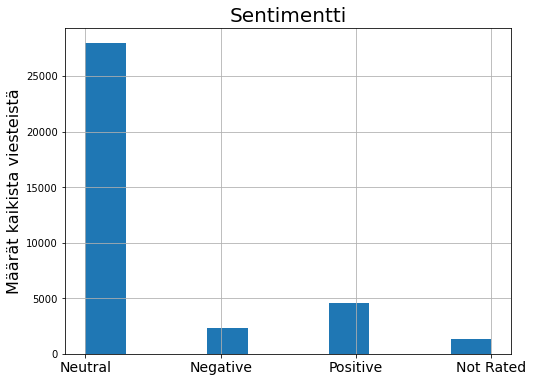

In [8]:
# Sentimentit määrinä, neutraaleja 27 948, myönteisiä 4543, kielteisiä 2335 

plt.figure(figsize=(8,6))
df.Sentiment.hist(xlabelsize=14)
plt.title('Sentimentti', fontsize=20)
plt.ylabel('Määrät kaikista viesteistä', fontsize=16)
plt.show()

In [9]:
# Lähteet prosenttiosuuksina, Facebook 48%, Twitter 20%, Forums 8%

df.Source.value_counts(normalize=True).head(10)

Facebook        0.484932
Twitter         0.205994
Forums          0.087528
Blogs           0.081412
Youtube         0.013698
Ilta-Sanomat    0.009243
Comments        0.008329
Iltalehti.fi    0.006973
MSN (FI)        0.005451
MTV Uutiset     0.005424
Name: Source, dtype: float64

In [10]:
# Alueet prosentteina

df.Subregion.value_counts(normalize=True).head(10)

Kansalliset (National news)             0.444222
Etelä-Suomi                             0.211878
Yleiset (General)                       0.131220
Lounais-Suomi                           0.059390
Länsi- ja Sisä-Suomi                    0.035714
Itä-Suomi                               0.022071
Etelä-Suomi regional                    0.011236
Yleiset (General) regional              0.010835
Kansalliset (National news) regional    0.010032
Itä-Suomi regional                      0.008026
Name: Subregion, dtype: float64

In [11]:
# Viestien kielet prosentteina

df.Language.value_counts(normalize=True).head(10)

Finnish       0.941149
unknown       0.016214
English       0.014194
Estonian      0.009961
Indonesian    0.003127
Italian       0.002961
Swedish       0.002795
Latvian       0.002463
Lithuanian    0.001051
Portuguese    0.000941
Name: Language, dtype: float64

In [12]:
# Key Phrases, substantiivit, käsitteet prosentteina

df.Key_Phrases.value_counts(normalize=True).head(10)

helppo arkiruoka,helppo ruoka,terveellinen ruoka                                                                                                                                                                                                                                                                                                                                                                                                                                       0.004039
Curry paste,cook,paste,â and eggs,post,home,View,Perfect poached eggs,sizzling pan,egg whites,French baked egg dish,really hot pan,talented home cook,dough,yeast and water,minutesâ cooking time,recipes,Instagram,flour,water,tomato puree,up the dough,time,pasta machine,fresh dough,flat pasta â,garlic,Balsamic vinegar and rosemary,basic recipe,old pickling jars,vinegar or lemon juice,frozen supermarket pizza,outdoor pizza oven,spices,vinegar,Celine Jars,pizza,steak    0.003654
Curry paste,cook,paste,– and eggs,post,h

In [13]:
# Avainsanat prosentteina

df.Keywords.value_counts(normalize=True).head(10)

kotiruokaa         0.160739
ruoanlaittoon      0.087062
ruoanlaitto        0.077527
laittaa ruokaa     0.073144
kotiruoka          0.059611
arkiruokaa         0.053155
ruoanlaittoa       0.042820
arkiruoka          0.041665
kotiruokalounas    0.021825
Ruoanlaitto        0.021144
Name: Keywords, dtype: float64

In [14]:
# Asuinmaakunnat prosentteina

df.State.value_counts(normalize=True).head(10)

Uusimaa                  0.471391
Finland Proper           0.120892
Pirkanmaa                0.087148
Northern Ostrobothnia    0.084067
Päijänne Tavastia        0.026849
Central Finland          0.024941
England                  0.023474
Satakunta                0.018926
North Karelia            0.015698
Tavastia Proper          0.012324
Name: State, dtype: float64

In [15]:
# Kaupungit prosentteina

df.City.value_counts(normalize=True).head(10)

Helsinki     0.388037
Tampere      0.078686
Turku        0.055939
Vantaa       0.040944
Oulu         0.034035
Espoo        0.033530
Lahti        0.025274
Jyväskylä    0.021398
Pori         0.015838
Hyvinge      0.011626
Name: City, dtype: float64

In [16]:
# Kasvukaupungeissa eniten kielteistä keskustelua

df.groupby('Sentiment')['City'].value_counts(normalize=True).head(10)

Sentiment  City        
Negative   Helsinki        0.330454
           Tampere         0.127430
           Turku           0.071274
           Espoo           0.053996
           Oulu            0.030238
           Lahti           0.028078
           Lappeenranta    0.021598
           Jyväskylä       0.019438
           Vantaa          0.019438
           Kuopio          0.017279
Name: City, dtype: float64

In [17]:
# Kasvukeskuksissa eniten kielteistä keskustelua

df.groupby('Sentiment')['State'].value_counts().head(10)

Sentiment  State                
Negative   Uusimaa                  209
           Pirkanmaa                 73
           Northern Ostrobothnia     64
           Finland Proper            51
           Päijänne Tavastia         17
           Central Finland           13
           South Karelia             13
           Northern Savo             12
           Satakunta                 12
           Lapland                    8
Name: State, dtype: int64

In [18]:
# uniikit määrät

pd.set_option('display.max_colwidth', None)
df.groupby('Sentiment').describe()

Reach                                                          \
             count           mean           std  min   25%     50%     75%   
Sentiment                                                                    
Negative    2335.0   18628.757173  2.417343e+05  0.0   0.0     0.0   601.5   
Neutral    27948.0  246826.347825  3.768918e+06  0.0  19.0  1005.0  4540.0   
Not Rated   1316.0    1502.362462  2.369499e+04  0.0   0.0     5.0   319.0   
Positive    4543.0   25826.256218  4.656433e+05  0.0   0.0   380.0  2007.5   

                       Desktop_Reach                ... Twitter_Authority  \
                   max         count          mean  ...               75%   
Sentiment                                           ...                     
Negative     5561677.0        2335.0   6108.761456  ...               6.0   
Neutral    185944473.0       27948.0  91049.987262  ...               6.0   
Not Rated     851995.0        1316.0      0.000000  ...               5.0   
Positive    28760792.0        4543.0   4722.062294  ...               6.0   

                Twitter_Followers                                         \
            max             count         mean           std  min    25%   
Sentiment                                                                  
Negative   10.0             899.0  3137.670745  21855.123562  1.0  138.5   
Neutral    10.0            4927.0  4200.944591  23819.795526  1.0  173.5   
Not Rated   7.0              30.0   536.133333    771.847793  1.0   69.0   
Positive   10.0            1498.0  3537.530040  21279.470579  1.0  125.5   

                                     
             50%      75%       max  
Sentiment                            
Negative   453.0  1581.00  321471.0  
Neutral    621.0  1945.00  323211.0  
Not Rated  172.0   626.25    2567.0  
Positive   505.0  1835.25  259894.0  

[4 rows x 72 columns]

In [19]:
# tuodaan kirjastoja sisään, nltk

import pandas as pd
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string

In [20]:
# dataan tutustuminen

pd.set_option('display.max_colwidth', None)
df.head()

,Date,Headline,Sentence,Source,Influencer,Country,Subregion,Language,Reach,Desktop_Reach,...,Facebook_Social_Echo,Reddit_Social_Echo,Engagement,Sentiment,Key_Phrases,Keywords,Twitter_Authority,Twitter_Followers,State,City
0,2020-01-01,NaN,toimitanlähialueille Onko esim läheisesi sairashaluaisi hyvää kotiruokaa? Kysyppä rohkeasti! parhaiten tavoittaa viestillä,Facebook,Mamman keittiöstä,Unknown,NaN,Finnish,544,0,...,NaN,NaN,0.0,Neutral,"lounasta kotiin,Mamman keittiöstä,viestillä,hyvää kotiruokaa,annoksia,lähialueille",kotiruokaa,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,teit uudelle vuodelle? 😊✨\n\nVinkki:kaipaat alkuvuoteen kevyempään arkiruokaanterveellisempiä välipalojanäillä resepteillä,Facebook,Yhteishyvä,Unknown,NaN,Finnish,82898,0,...,NaN,NaN,0.0,Neutral,"uudelle vuodelle,kaipaat alkuvuoteen,oloa,resepteillä kevennät ruokavaliota,😘👇,lupauksia,kevyempään arkiruokaan,terveellisempiä välipaloja",arkiruokaan,NaN,NaN,NaN,NaN
2,2020-01-01,NaN,ruoka-aineet löydät lähikaupastasi Valmennuksessa syödään terveellistä kotiruokaa ilman lisäravinnepurkkien armeijaa\n✔️Voit treenata missä,Facebook,MT Personal Training,Unknown,NaN,Finnish,1258,0,...,NaN,NaN,0.0,Neutral,"SUURIN MUUTOS -valmennus,energiaa arkeesi,lisäravinnepurkkien armeijaa,Palkitsemme valmennuksen lopuksi,SISÄLTÄÄ 👉,terveellisiä elämäntapoja,✔️Valmennuksessa,Valmennuksessa,koko loppuelämäsi ajan",kotiruokaa,NaN,NaN,NaN,NaN
3,2020-01-01,NaN,\n#ruokarytmieiluovutetauusivuosisäännöllinenruokailusäännöllinenliikuntaarkiruokaahedelmiävihanneksiaproteiinirasva,Facebook,PT Tahdolla Tavoitteeseen Henkilökohtaista valmennusta,Unknown,NaN,Finnish,232,0,...,NaN,NaN,0.0,Negative,"hyvää oloa,hyvä ajatus,energiaa,iloa,omaa hyvinvointia,Artic Circle-Lapland-Finland,säännöllisestä ruokarytmistä,lipsua,oikeaoppista ruokarytmiä,painon jojoilu,elimistöä,elämäntavan",arkiruokaa,NaN,NaN,NaN,NaN
4,2020-01-01,NaN,:\n\n🌲Kuusiöljy Miellyttävän makuinenterveellinen öljy salaatteihinruoanlaittoon Huuhtele kuivaaleikkaa muutama kuusenoksa 2-3,Facebook,Villiyrttipuoti Vildörtaboden,Unknown,NaN,Swedish,300,0,...,NaN,NaN,0.0,Neutral,"svag värme,Oljan,klipp,burken,kilo socker,🌲Älä heitä,🌲Granbad,Koka,kuivaa ja,varten käytä,vatten,pois,🌲Tack,sirap,🌲Kuusiöljy,kvistarna,Picea,🌲Höyryhoito,minuuttia,Keitä,Ångans,litraa oksasilppua,litraa hauduketta",ruoanlaittoon,NaN,NaN,NaN,NaN


In [21]:
# Tuodaan kirjastot sisään, useimmin käytetyt twiitit myönteiset ja kielteiset 
# Tavoite on saada näkemystä useimmin käytetyistä sanoista

from wordcloud import WordCloud,STOPWORDS

In [22]:
# dropataan pois tyhjät rivit

df = df.dropna(subset = ['Sentence'])

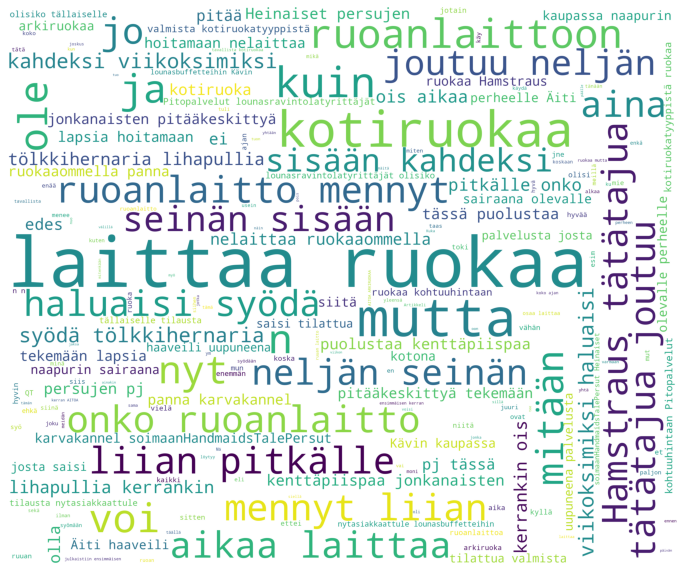

In [23]:
# Tehdään Wordcloud negatiivisista sentimenteistä.
# Wordcloud on hyvä työkalu visualisoida NLP dataa.
# Mitä suuremmat sanafontti, sitä suurempi frekvenssi on tekstidatassa. 

# Sanat, katsotaan mitkä ovat yleisimpien joukossa.
# Mutta joukossa on myös sanoja, jotka eivät välttämättä tarkoita mitään.

new_df=df[df['Sentiment']=='Negative']
words = ' '.join(new_df['Sentence'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
# dropataan pois tyhjiä rivejä

df = df.dropna(subset = ['Key_Phrases'])

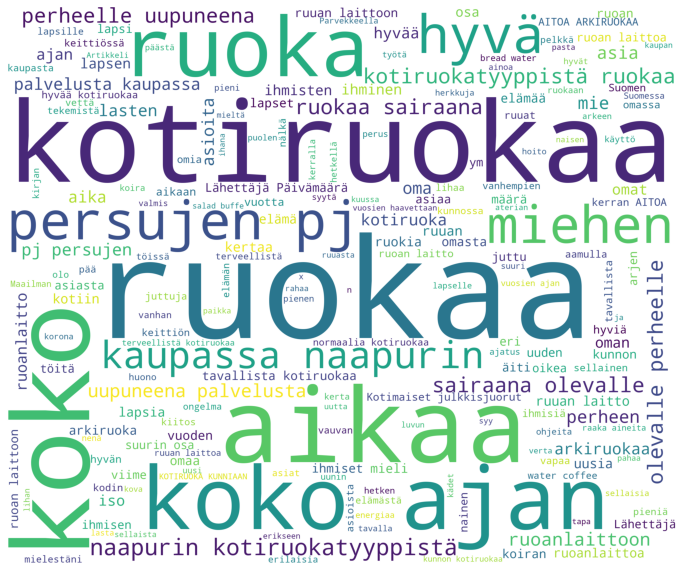

In [25]:
# Tehdään Wordcloud negatiivisista sentimenteistä.
# Wordcloud on hyvä työkalu visualisoida NLP dataa.
# Mitä suuremmat sanafontti, sitä suurempi frekvenssi on tekstidatassa. 

# Sanat,  katsotaan mitkä ovat yleisimpien joukossa.
# Mutta joukossa on myös sanoja, jotka eivät välttämättä tarkoita mitään.

new_df=df[df['Sentiment']=='Negative']
words = ' '.join(new_df['Key_Phrases'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()